# Main Analysis

In [1]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import matplotlib.pyplot as plt
%matplotlib inline

Size of Database as of writing: 

In [2]:
path_for_images = Path("../../images/folk_thm/main_analysis/")
path_for_images.mkdir(parents=True, exist_ok=True)

database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

## p-Thresholds

Looking at the probabilities of the game ending for all the games (ignoring whether the games are degenerate or not)

In [3]:
p_thresh_data = pd.read_csv("..\database-code\data\prob_end_threshold\main-new.csv")
p_thresh_data.head(), len(p_thresh_data)

(   number_of_players  tournament_player_set  noise      min_p_threshold  \
 0                  2                      0    0.0  0.28326262626262627   
 1                  2                      0    0.1  0.17237373737373737   
 2                  2                      0    0.2                 None   
 3                  2                      0    0.3                 None   
 4                  2                      0    0.4                 None   
 
       mean_p_threshold   median_p_threshold      max_p_threshold  
 0  0.28326262626262627  0.28326262626262627  0.28326262626262627  
 1  0.17237373737373737  0.17237373737373737  0.17237373737373737  
 2                 None                 None                 None  
 3                 None                 None                 None  
 4                 None                 None                 None  , 1749)

In [4]:
len(p_thresh_data[p_thresh_data["min_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["mean_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["median_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["max_p_threshold"] == "None"])

(276, 276, 276, 276)

In [5]:
for p_type in ["min_p_threshold", "mean_p_threshold", "median_p_threshold", "max_p_threshold"]:
    p_thresh_data = p_thresh_data.drop(p_thresh_data[p_thresh_data[p_type] == "None"].index, 0)
p_thresh_data.dtypes

number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold           object
mean_p_threshold          object
median_p_threshold        object
max_p_threshold           object
dtype: object

In [6]:
p_thresh_data = p_thresh_data.astype({"min_p_threshold": float, "mean_p_threshold": float, "median_p_threshold": float, "max_p_threshold": float,})
p_thresh_data.head()

number_of_players  tournament_player_set  noise  min_p_threshold  \
0                  2                      0    0.0         0.283263   
1                  2                      0    0.1         0.172374   
6                  2                      0    0.6         1.000000   
7                  2                      0    0.7         1.000000   
8                  2                      0    0.8         1.000000   

   mean_p_threshold  median_p_threshold  max_p_threshold  
0          0.283263            0.283263         0.283263  
1          0.172374            0.172374         0.172374  
6          1.000000            1.000000         1.000000  
7          1.000000            1.000000         1.000000  
8          1.000000            1.000000         1.000000

In [7]:
min_thresh_plot_path = path_for_images / "min_p_thresh.pdf"

min_thresh_plot = plt.figure()
axes = min_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["min_p_threshold"], "x")
min_thresh_plot.savefig(str(min_thresh_plot_path))

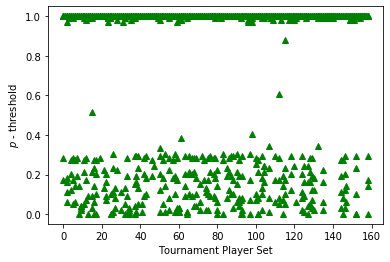

In [8]:
max_thresh_plot_path = path_for_images / "max_p_thresh.pdf"

max_thresh_plot = plt.figure()
axes = max_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["max_p_threshold"], "^", color="green")
max_thresh_plot.savefig(str(max_thresh_plot_path))

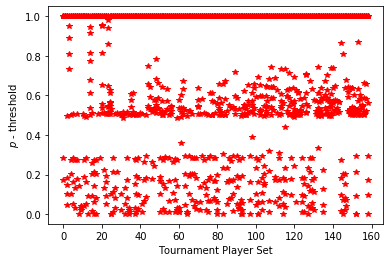

In [9]:
mean_thresh_plot_path = path_for_images / "mean_p_thresh.pdf"

mean_thresh_plot = plt.figure()
axes = mean_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["mean_p_threshold"], "*", color="red")
mean_thresh_plot.savefig(str(mean_thresh_plot_path))

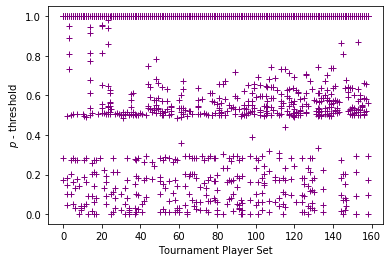

In [10]:
median_thresh_plot_path = path_for_images / "median_p_thresh.pdf"

median_thresh_plot = plt.figure()
axes = median_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["median_p_threshold"], "+", color="purple")
median_thresh_plot.savefig(str(median_thresh_plot_path))

Looking at the probabilities of the game ending for all the games which are definitely non-degenerate.

In [11]:
p_thresh_data_no_degeneracy = pd.read_csv("..\database-code\data\prob_end_threshold\main_no_degeneracy-new.csv")
p_thresh_data_no_degeneracy.head()

number_of_players  tournament_player_set  noise      min_p_threshold  \
0                  2                      0    0.0  0.28326262626262627   
1                  2                      0    0.1  0.17237373737373737   
2                  2                      0    0.2                 None   
3                  2                      0    0.3                 None   
4                  2                      0    0.4                 None   

      mean_p_threshold   median_p_threshold      max_p_threshold  
0  0.28326262626262627  0.28326262626262627  0.28326262626262627  
1  0.17237373737373737  0.17237373737373737  0.17237373737373737  
2                 None                 None                 None  
3                 None                 None                 None  
4                 None                 None                 None

In [12]:
len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["min_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["mean_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["median_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["max_p_threshold"] == "None"])

(275, 275, 275, 275)

In [13]:
for p_type in ["min_p_threshold", "mean_p_threshold", "median_p_threshold", "max_p_threshold"]:
    p_thresh_data_no_degeneracy = p_thresh_data_no_degeneracy.drop(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy[p_type] == "None"].index, 0)
p_thresh_data_no_degeneracy.dtypes

number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold           object
mean_p_threshold          object
median_p_threshold        object
max_p_threshold           object
dtype: object

In [14]:
p_thresh_data_no_degeneracy = p_thresh_data_no_degeneracy.astype({"min_p_threshold": float, "mean_p_threshold": float, "median_p_threshold": float, "max_p_threshold": float,})
p_thresh_data_no_degeneracy.head()

number_of_players  tournament_player_set  noise  min_p_threshold  \
0                  2                      0    0.0         0.283263   
1                  2                      0    0.1         0.172374   
6                  2                      0    0.6         1.000000   
7                  2                      0    0.7         1.000000   
8                  2                      0    0.8         1.000000   

   mean_p_threshold  median_p_threshold  max_p_threshold  
0          0.283263            0.283263         0.283263  
1          0.172374            0.172374         0.172374  
6          1.000000            1.000000         1.000000  
7          1.000000            1.000000         1.000000  
8          1.000000            1.000000         1.000000

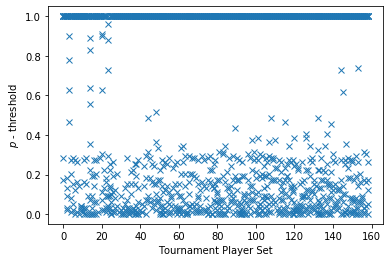

In [15]:
non_degenerate_min_thresh_plot_path = path_for_images / "non_degenerate_min_p_thresh.pdf"

non_degenerate_min_thresh_plot = plt.figure()
axes = non_degenerate_min_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["min_p_threshold"], "x")
non_degenerate_min_thresh_plot.savefig(str(non_degenerate_min_thresh_plot_path))

In [16]:
non_degenerate_max_thresh_plot_path = path_for_images / "non_degenerate_max_p_thresh.pdf"

non_degenerate_max_thresh_plot = plt.figure()
axes = non_degenerate_max_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["max_p_threshold"], "^", color="green")
non_degenerate_max_thresh_plot.savefig(str(non_degenerate_max_thresh_plot_path))

In [17]:
non_degenerate_mean_thresh_plot_path = path_for_images / "non_degenerate_mean_p_thresh.pdf"

non_degenerate_mean_thresh_plot = plt.figure()
axes = non_degenerate_mean_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["mean_p_threshold"], "*", color="red")
non_degenerate_mean_thresh_plot.savefig(str(non_degenerate_mean_thresh_plot_path))

In [18]:
non_degenerate_median_thresh_plot_path = path_for_images / "non_degenerate_median_p_thresh.pdf"

non_degenerate_median_thresh_plot = plt.figure()
axes = non_degenerate_median_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["median_p_threshold"], "+", color="purple")
non_degenerate_median_thresh_plot.savefig(str(non_degenerate_median_thresh_plot_path))

In [59]:
p_mean_middle_data = p_thresh_data_no_degeneracy[(p_thresh_data_no_degeneracy["mean_p_threshold"] <= 0.6) & (p_thresh_data_no_degeneracy["mean_p_threshold"] >= 0.5)]

p_mean_middle_data_plot_path = path_for_images / "p_mean_middle_data_plot.pdf"

p_mean_middle_data_plot = plt.figure()
axes = p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_mean_middle_data["tournament_player_set"], p_mean_middle_data["max_p_threshold"], "x", color="blue")
axes.plot(p_mean_middle_data["tournament_player_set"], p_mean_middle_data["min_p_threshold"], "*", color="red")
p_mean_middle_data_plot.savefig(str(p_mean_middle_data_plot_path))

Here we will consider the mean(?) p-values only, with non_degenerate games.

### Effects of different number of players

In [19]:
separated_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["number_of_players"] == player_number]
separated_player_dict.keys()   

dict_keys(['2', '3', '4', '5', '6', '7', '8'])

finished!


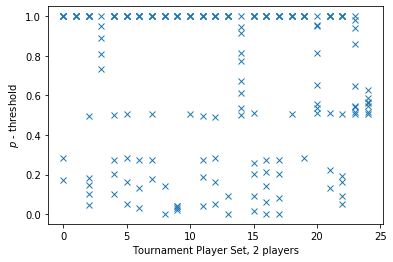

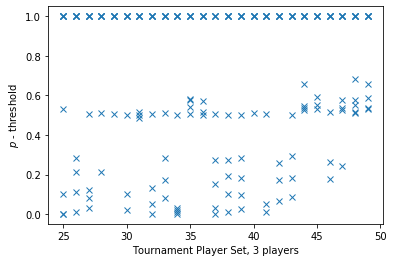

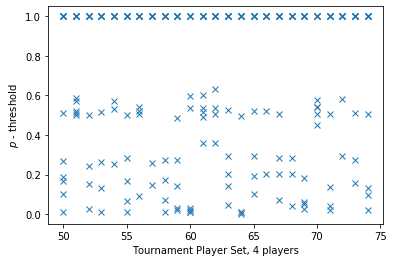

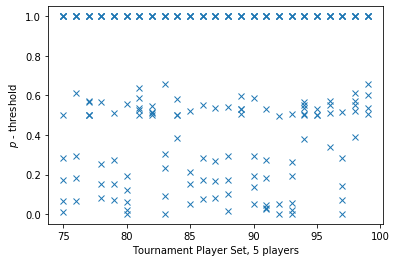

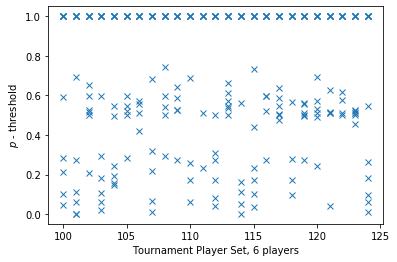

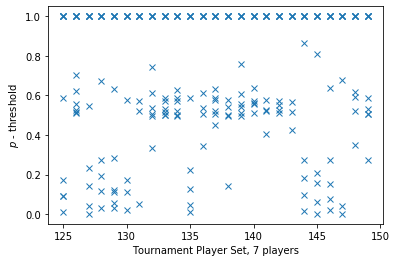

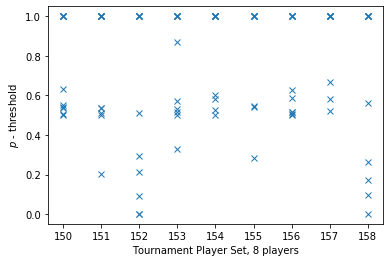

In [20]:
for player_number in separated_player_dict.keys():
    file_name = str(player_number) + "player_mean_p_thresh_alt.pdf"
    player_mean_thresh_plot_path = path_for_images / file_name
    player_mean_thresh_plot = plt.figure()
    axes = player_mean_thresh_plot.add_subplot(1, 1, 1)
    axes.set_xlabel("Tournament Player Set" + ", " + str(player_number) + " " + "players")
    axes.set_ylabel("$p$ - threshold")
    axes.plot(separated_player_dict[str(player_number)]["tournament_player_set"], separated_player_dict[str(player_number)]["mean_p_threshold"], "x")
    player_mean_thresh_plot.savefig(str(player_mean_thresh_plot_path))
print("finished!")

In [21]:
player_thresh_data = [separated_player_dict[str(player_number)]["mean_p_threshold"] for player_number in range(2, 9)]
for element in range(7):
    player_thresh_data[element].index = range(len(player_thresh_data[element]))

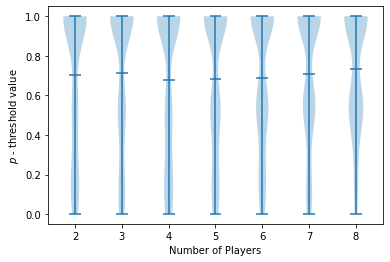

In [23]:
player_mean_thresh_violin_path = path_for_images / "player_mean_thresh_violinplot.pdf"
player_mean_thresh_violinplot = plt.figure()
axes = player_mean_thresh_violinplot.add_subplot(1, 1, 1)
axes.set_xlabel("Number of Players")
axes.set_xticks(np.arange(1, len(range(7))+1))
axes.set_xticklabels(list(range(2, 9)))
axes.set_ylabel("$p$ - threshold value")
axes.violinplot(player_thresh_data, showmeans=True, showmedians=False)
player_mean_thresh_violinplot.savefig(str(player_mean_thresh_violin_path))

### Effects of Noise

In [25]:
separated_noise_dict = {}
for amount_of_noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    separated_noise_dict[str(amount_of_noise)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["noise"] == amount_of_noise]
separated_noise_dict.keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

finished!


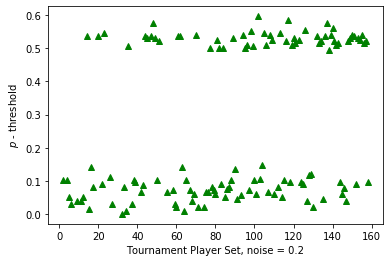

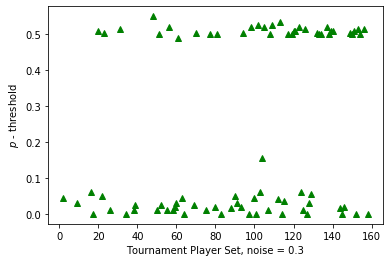

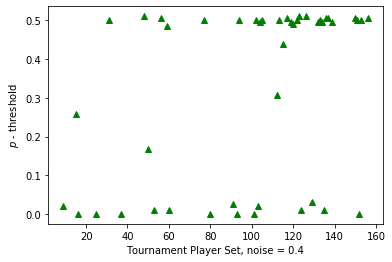

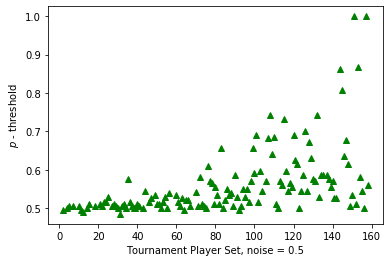

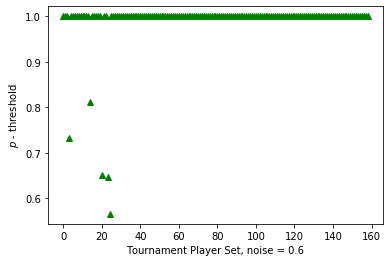

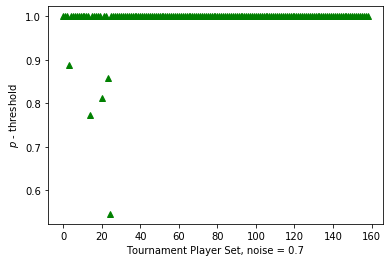

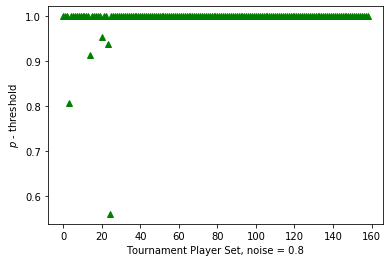

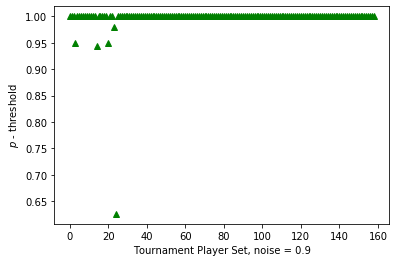

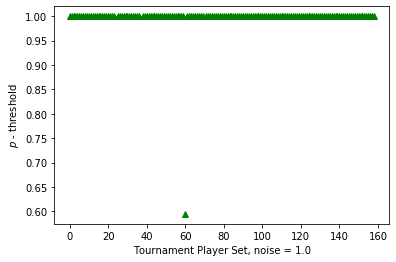

In [26]:
for amount_of_noise in separated_noise_dict.keys():
    file_name = str(amount_of_noise) + "noise_mean_p_thresh.pdf"
    noise_mean_thresh_plot_path = path_for_images / file_name
    noise_mean_thresh_plot = plt.figure()
    axes = noise_mean_thresh_plot.add_subplot(1, 1, 1)
    axes.set_xlabel("Tournament Player Set" + ", noise = " + str(amount_of_noise))
    axes.set_ylabel("$p$ - threshold")
    axes.plot(separated_noise_dict[str(amount_of_noise)]["tournament_player_set"], separated_noise_dict[str(amount_of_noise)]["mean_p_threshold"], "^", color = "green")
    noise_mean_thresh_plot.savefig(str(noise_mean_thresh_plot_path))
print("finished!")

In [27]:
noise_thresh_data = [separated_noise_dict[str(amount_of_noise)]["mean_p_threshold"] for amount_of_noise in separated_noise_dict.keys()]
for element in range(11):
    noise_thresh_data[element].index = range(len(noise_thresh_data[element]))

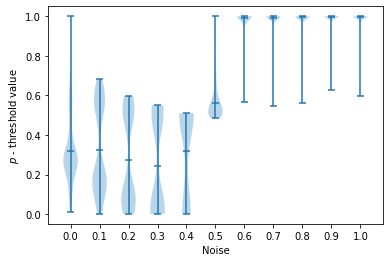

In [29]:
noise_mean_thresh_violin_path = path_for_images / "noise_mean_thresh_violinplot.pdf"
noise_mean_thresh_violinplot = plt.figure()
axes = noise_mean_thresh_violinplot.add_subplot(1, 1, 1)
axes.set_xlabel("Noise")
axes.set_xticks(np.arange(1, len(range(11))+1))
axes.set_xticklabels(separated_noise_dict.keys())
axes.set_ylabel("$p$ - threshold value")
axes.violinplot(noise_thresh_data, showmeans=True, showmedians=False)
noise_mean_thresh_violinplot.savefig(str(noise_mean_thresh_violin_path))

Effects of different amounts of noise AND different tournament sizes

In [42]:
separated_noise_and_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    for amount_of_noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        separated_noise_and_player_dict[str(player_number), str(amount_of_noise)] = p_thresh_data_no_degeneracy[(p_thresh_data_no_degeneracy["number_of_players"] == player_number) & (p_thresh_data_no_degeneracy["noise"] == amount_of_noise)]
separated_noise_and_player_dict.keys()

dict_keys([('2', '0.0'), ('2', '0.1'), ('2', '0.2'), ('2', '0.3'), ('2', '0.4'), ('2', '0.5'), ('2', '0.6'), ('2', '0.7'), ('2', '0.8'), ('2', '0.9'), ('2', '1.0'), ('3', '0.0'), ('3', '0.1'), ('3', '0.2'), ('3', '0.3'), ('3', '0.4'), ('3', '0.5'), ('3', '0.6'), ('3', '0.7'), ('3', '0.8'), ('3', '0.9'), ('3', '1.0'), ('4', '0.0'), ('4', '0.1'), ('4', '0.2'), ('4', '0.3'), ('4', '0.4'), ('4', '0.5'), ('4', '0.6'), ('4', '0.7'), ('4', '0.8'), ('4', '0.9'), ('4', '1.0'), ('5', '0.0'), ('5', '0.1'), ('5', '0.2'), ('5', '0.3'), ('5', '0.4'), ('5', '0.5'), ('5', '0.6'), ('5', '0.7'), ('5', '0.8'), ('5', '0.9'), ('5', '1.0'), ('6', '0.0'), ('6', '0.1'), ('6', '0.2'), ('6', '0.3'), ('6', '0.4'), ('6', '0.5'), ('6', '0.6'), ('6', '0.7'), ('6', '0.8'), ('6', '0.9'), ('6', '1.0'), ('7', '0.0'), ('7', '0.1'), ('7', '0.2'), ('7', '0.3'), ('7', '0.4'), ('7', '0.5'), ('7', '0.6'), ('7', '0.7'), ('7', '0.8'), ('7', '0.9'), ('7', '1.0'), ('8', '0.0'), ('8', '0.1'), ('8', '0.2'), ('8', '0.3'), ('8', '0.

ys.path.
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

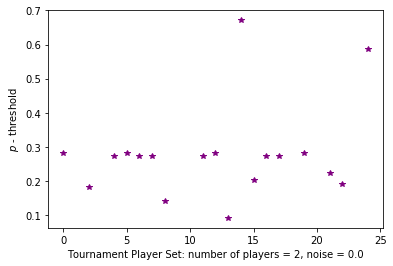

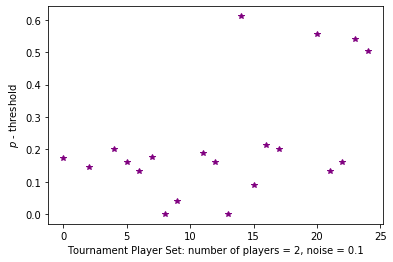

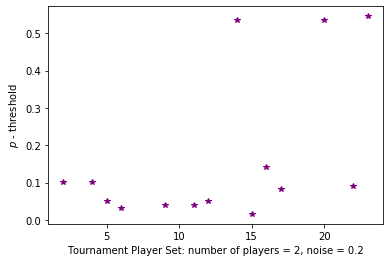

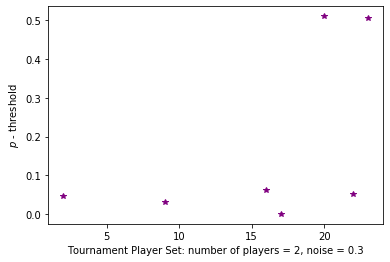

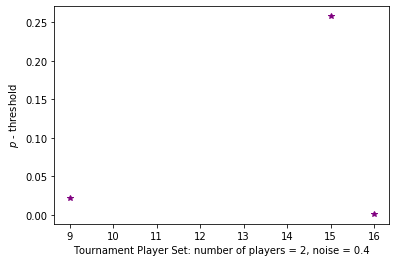

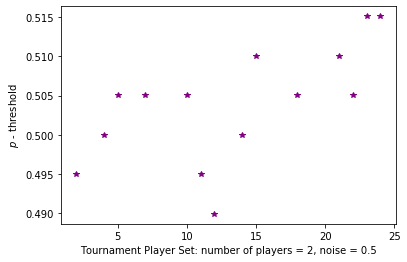

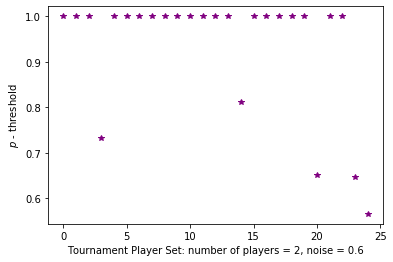

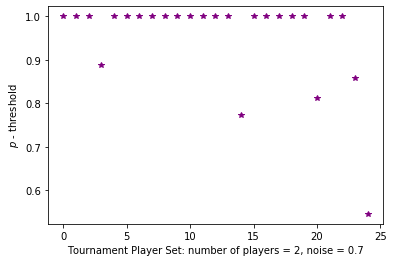

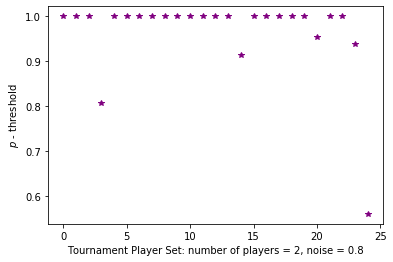

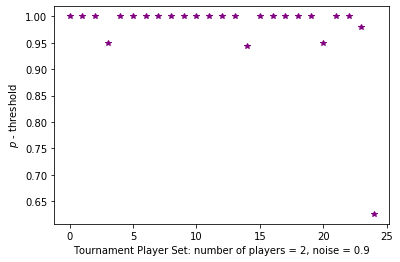

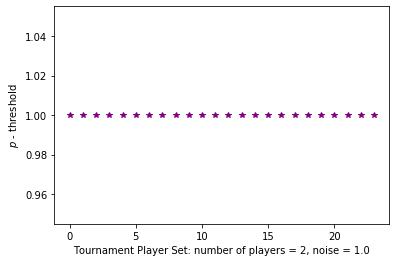

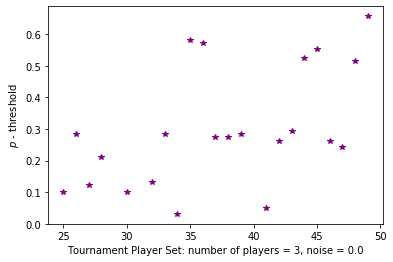

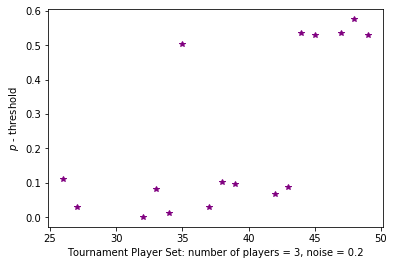

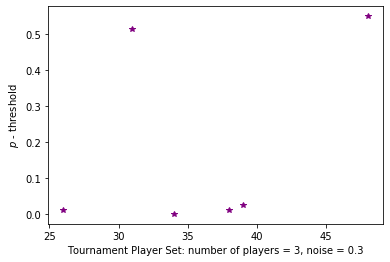

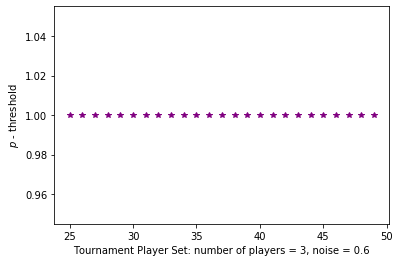

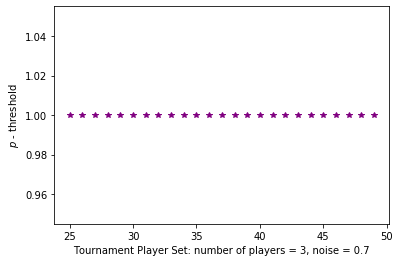

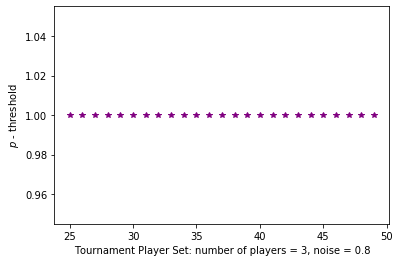

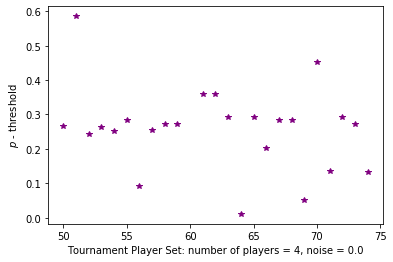

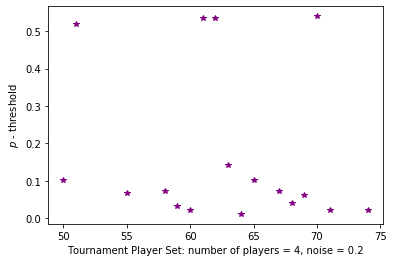

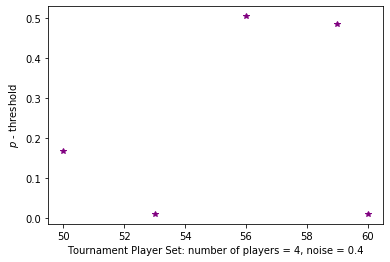

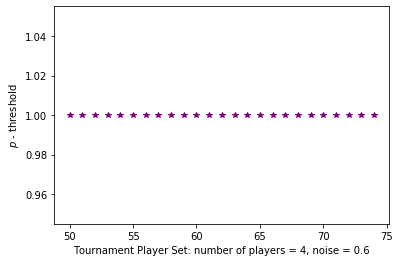

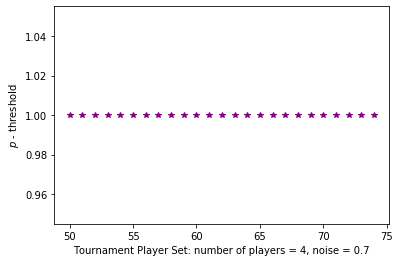

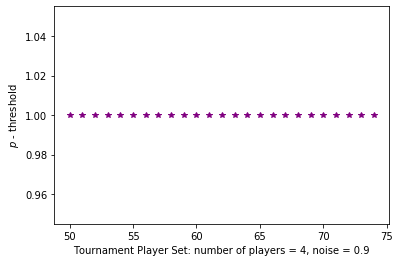

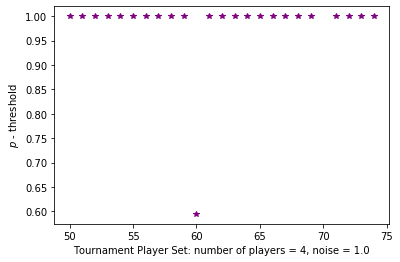

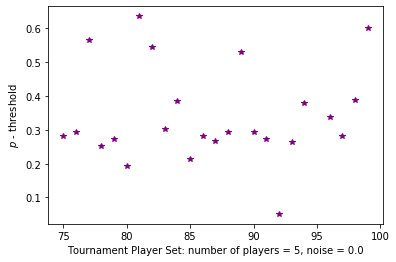

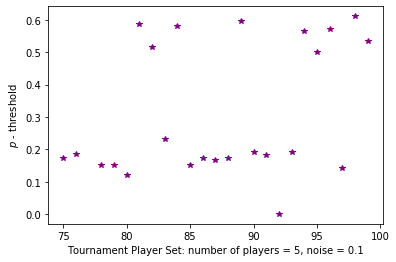

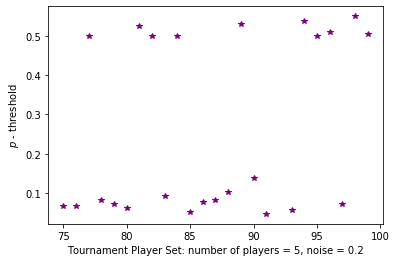

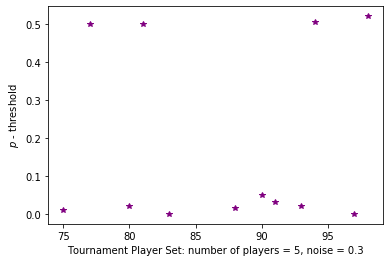

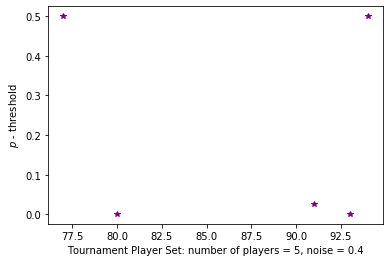

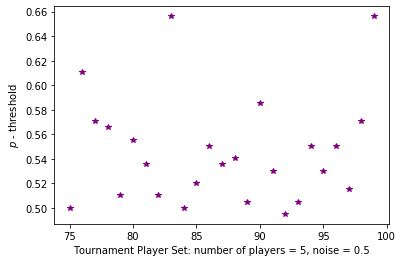

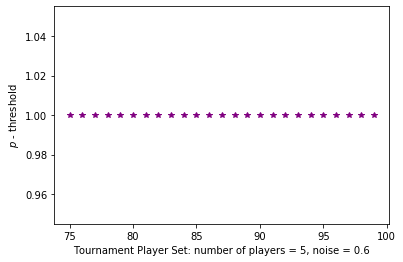

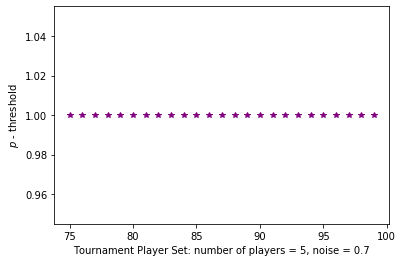

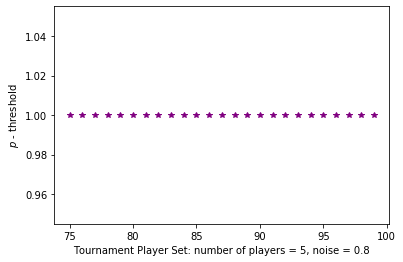

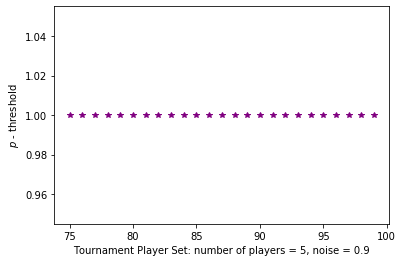

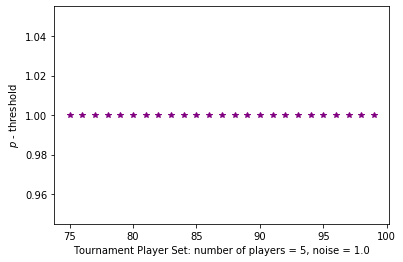

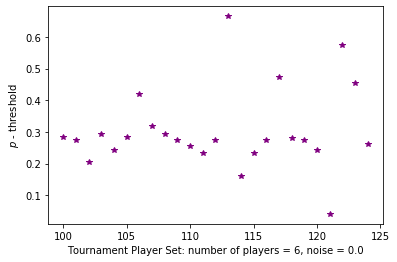

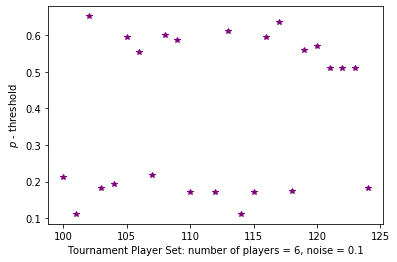

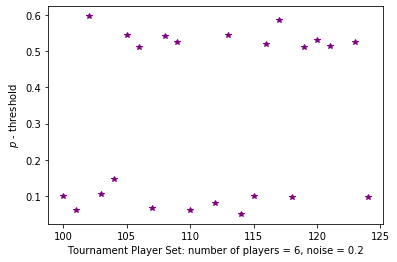

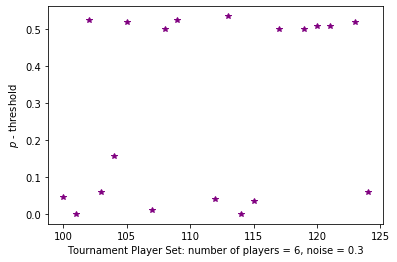

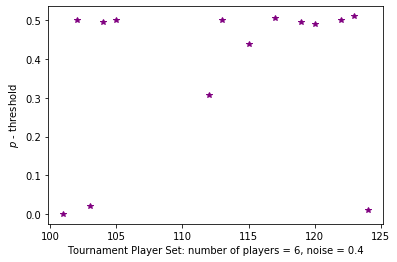

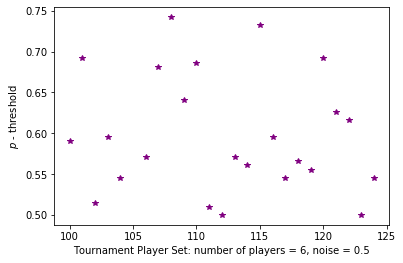

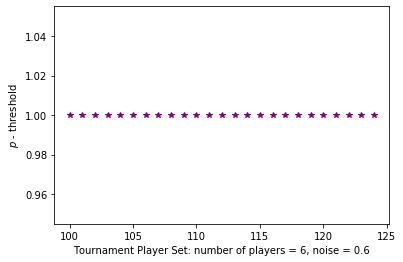

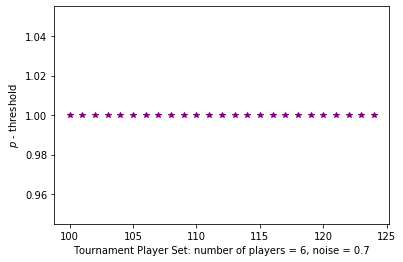

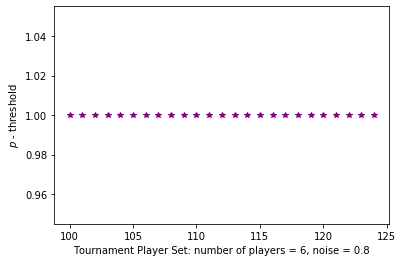

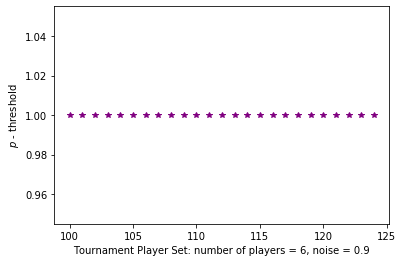

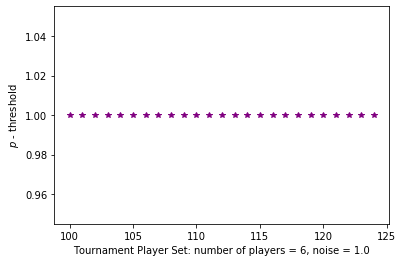

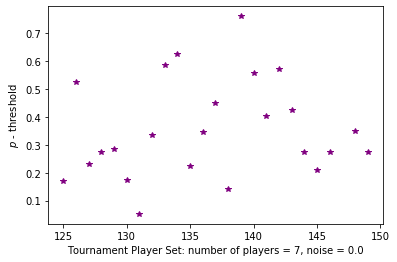

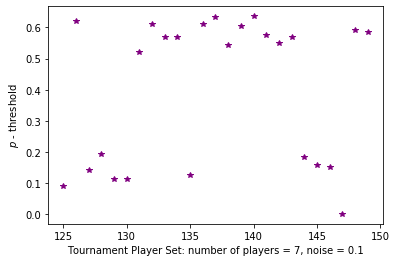

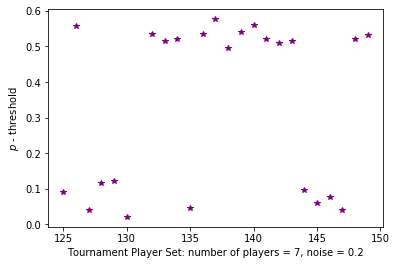

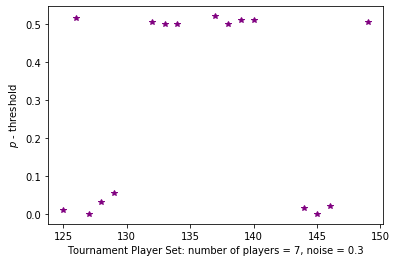

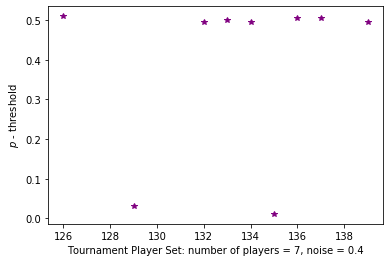

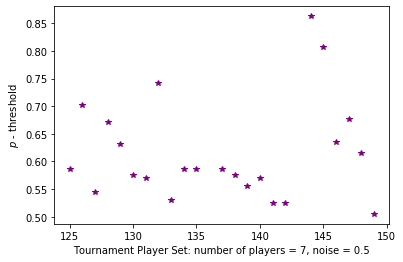

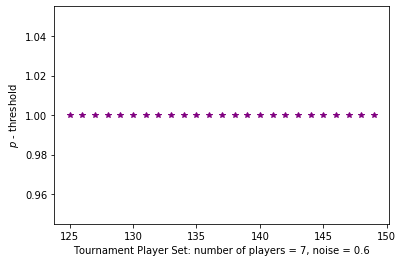

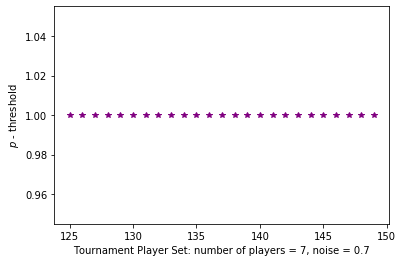

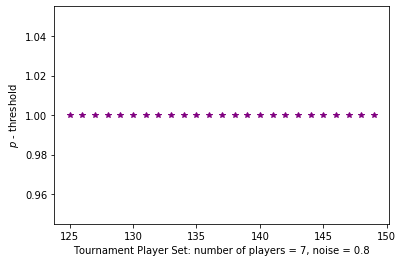

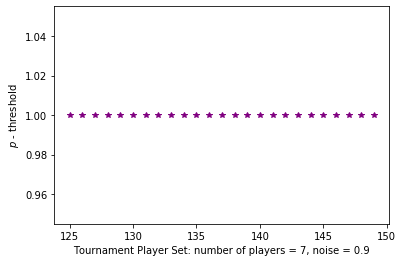

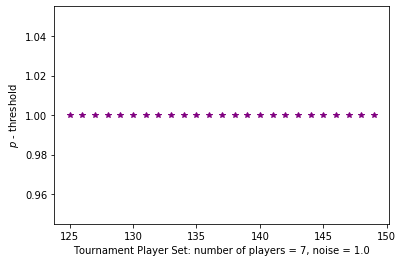

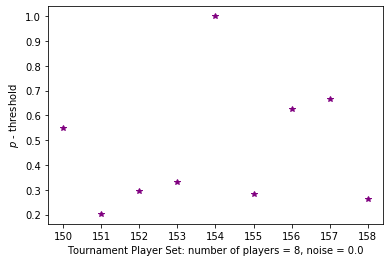

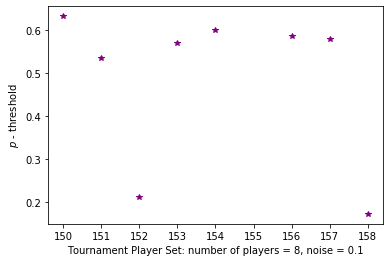

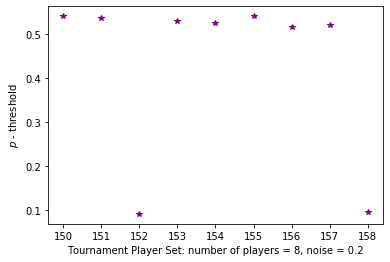

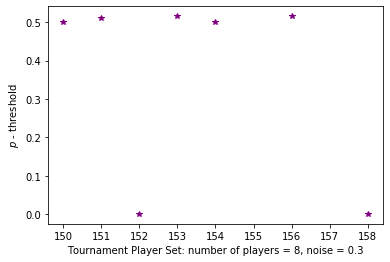

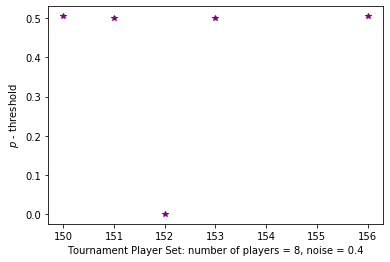

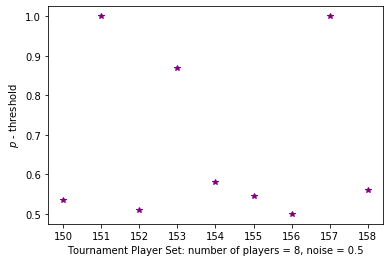

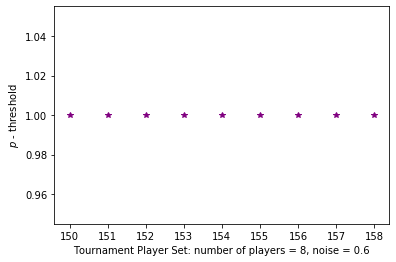

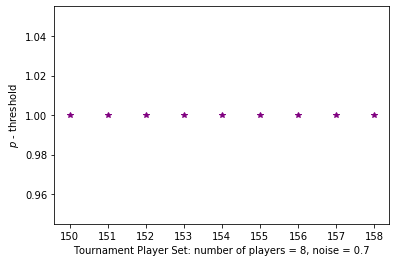

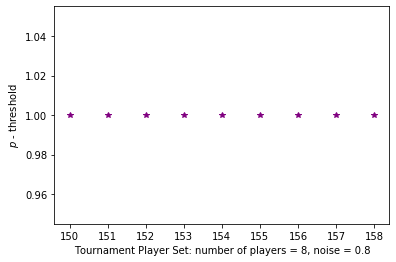

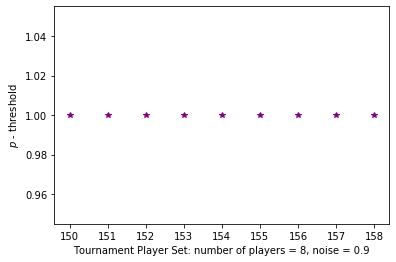

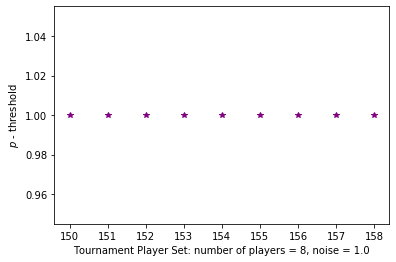

In [52]:
for key in separated_noise_and_player_dict.keys():
    file_name = str(key) + "_mean_p_thresh.pdf"
    key_mean_thresh_plot_path = path_for_images / file_name
    key_mean_thresh_plot = plt.figure()
    axes = key_mean_thresh_plot.add_subplot(1, 1, 1)
    axes.set_xlabel("Tournament Player Set:" + " number of players = " + str(key[0]) + ", noise = " + str(key[1]))
    axes.set_ylabel("$p$ - threshold")
    axes.plot(separated_noise_and_player_dict[key]["tournament_player_set"], separated_noise_and_player_dict[key]["mean_p_threshold"], "*", color = "purple")
    key_mean_thresh_plot.savefig(str(key_mean_thresh_plot_path))
print("finished!")